<a href="https://colab.research.google.com/github/PradeepKumarDataAnalyst/App_Rating_Prediction/blob/main/App_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.__version__

'1.3.5'

**1 . Load the data file using pandas**

In [ ]:
df = pd.read_csv("googleplaystore.csv")


In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
pd.set_option('display.max_columns' , None) # python display only 20 columns , start-10 and end-10
# pd.set_option('display.max_rows' , 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(10841, 13)

**2 . Check for null values in the data. Get the number of null values for each column.**

In [ ]:
df.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
print(df.shape[0])  # Display number of rows
print(df.shape[1])  # Display number of columns

10841
13


In [ ]:
df.shape

(10841, 13)

In [ ]:
round( ( df.isnull().sum() / df.shape[0] ) * 100 , 2)    # Display in percentage

App                0.00
Category           0.00
Rating            13.60
Reviews            0.00
Size               0.00
Installs           0.00
Type               0.01
Price              0.00
Content Rating     0.01
Genres             0.00
Last Updated       0.00
Current Ver        0.07
Android Ver        0.03
dtype: float64


# Convert kbytes to mbytes 
k_indices = df['Size'].loc[df['Size'].str.contains('k')].index.tolist()

converter = pd.DataFrame(df.loc[k_indices, 'Size'].apply(lambda x: x.strip('k')).astype(float).apply(lambda x: x / 1024).apply(lambda x: round(x, 3)).astype(str))

df.loc[k_indices,'Size'] = converter

**Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.**

**Extract the numeric value from the column**

**Multiply the value by 1,000, if size is mentioned in Mb**

In [ ]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
df['Size'].value_counts # Single Column analysis

<bound method IndexOpsMixin.value_counts of 0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, Length: 10841, dtype: object>

In [ ]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:
# df['Size'] = [float(i.split('M')[0]) if 'M' in i else float(0) for i in df['Size']]

def size_convert(y) :
  if 'M' in y :
    x = y[:-1] #19M
    x = float(x) * 1000
    return x
  elif 'K' in y :
    x = y[:-1]
    return x
  else :
    return None

In [ ]:
df['Size'] = df['Size'].apply(size_convert)

In [ ]:
df['Size'].unique()

array([ 19000.,  14000.,   8700.,  25000.,   2800.,   5600.,  29000.,
        33000.,   3100.,  28000.,  12000.,  20000.,  21000.,  37000.,
         2700.,   5500.,  17000.,  39000.,  31000.,   4200.,   7000.,
        23000.,   6000.,   6100.,   4600.,   9200.,   5200.,  11000.,
        24000.,     nan,   9400.,  15000.,  10000.,   1200.,  26000.,
         8000.,   7900.,  56000.,  57000.,  35000.,  54000.,   3600.,
         5700.,   8600.,   2400.,  27000.,   2500.,  16000.,   3400.,
         8900.,   3900.,   2900.,  38000.,  32000.,   5400.,  18000.,
         1100.,   2200.,   4500.,   9800.,  52000.,   9000.,   6700.,
        30000.,   2600.,   7100.,   3700.,  22000.,   7400.,   6400.,
         3200.,   8200.,   9900.,   4900.,   9500.,   5000.,   5900.,
        13000.,  73000.,   6800.,   3500.,   4000.,   2300.,   7200.,
         2100.,  42000.,   7300.,   9100.,  55000.,   6500.,   1500.,
         7500.,  51000.,  41000.,  48000.,   8500.,  46000.,   8300.,
         4300.,   47

In [ ]:
df['Size'].shape

(10841,)

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
#df['Size'] = 1000 * df['Size']
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df['Size'].unique()

array([ 19000.,  14000.,   8700.,  25000.,   2800.,   5600.,  29000.,
        33000.,   3100.,  28000.,  12000.,  20000.,  21000.,  37000.,
         2700.,   5500.,  17000.,  39000.,  31000.,   4200.,   7000.,
        23000.,   6000.,   6100.,   4600.,   9200.,   5200.,  11000.,
        24000.,     nan,   9400.,  15000.,  10000.,   1200.,  26000.,
         8000.,   7900.,  56000.,  57000.,  35000.,  54000.,   3600.,
         5700.,   8600.,   2400.,  27000.,   2500.,  16000.,   3400.,
         8900.,   3900.,   2900.,  38000.,  32000.,   5400.,  18000.,
         1100.,   2200.,   4500.,   9800.,  52000.,   9000.,   6700.,
        30000.,   2600.,   7100.,   3700.,  22000.,   7400.,   6400.,
         3200.,   8200.,   9900.,   4900.,   9500.,   5000.,   5900.,
        13000.,  73000.,   6800.,   3500.,   4000.,   2300.,   7200.,
         2100.,  42000.,   7300.,   9100.,  55000.,   6500.,   1500.,
         7500.,  51000.,  41000.,  48000.,   8500.,  46000.,   8300.,
         4300.,   47

***Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            8829 non-null   float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [ ]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
df[df.Reviews == '3.0M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,NaN,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
df['Reviews'] = df['Reviews'].str.replace('3.0M' , '3')

In [ ]:
df[10471:10474]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,NaN,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3,NaN,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4100.0,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up


In [ ]:
df['Reviews'] = df['Reviews'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            8829 non-null   float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.1+ MB


**Installs field is currently stored as string and has values like 1,000,000+. **

**Treat 1,000,000+ as 1,000,000**

**remove ‘+’, ‘,’ from the field, convert it to integer**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            8829 non-null   float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.1+ MB


In [ ]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [ ]:
df['Installs'] = df['Installs'].str.replace('+' , '')
df['Installs'] = df['Installs'].str.replace(',' , '')
df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0', 'Free'],
      dtype=object)

## For free apps (type = “Free”), 
## the price should not be >0. 
### Drop any such rows.

In [ ]:
df[df.Installs == 'Free']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3,NaN,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
df[df.Price > '0']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3,NaN,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
df.drop([10472] , inplace=True)

In [ ]:
df[10470:10474]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4000.0,10000,Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,NaN,100000,Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4100.0,10000000,Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14000.0,1000,Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up


In [ ]:
df['Installs'] = df['Installs'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            8829 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.2+ MB


 **Price field is a string and has dollor symbol.**
 **Remove ‘$’ sign, and convert it to numeric.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            8829 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.2+ MB


In [ ]:
df.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [ ]:
df['Price'] = df['Price'].str.replace('$' , '')
df.Price.unique()


array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [ ]:
df['Price'] = df['Price'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            8829 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


**Drop records with nulls in any of the columns**

In [ ]:
df.isnull().any()

App               False
Category          False
Rating             True
Reviews           False
Size               True
Installs          False
Type               True
Price             False
Content Rating    False
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

In [ ]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              2011
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [ ]:
df.Rating.median()

4.3

In [ ]:
df['Rating'] = df['Rating'].fillna(df['Rating'].median())

In [ ]:
df.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              2011
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

**Average rating should be between 1 and 5 as only these values are allowed**
**on the play store**

**Drop the rows that have a value outside this range.**

In [ ]:
df.Rating.max() , df.Rating.min()

(5.0, 1.0)

**Reviews should not be more than installs as only those who installed can review the app**

**If there are any such records, drop them.**

In [ ]:
df.Reviews.count() , df.Installs.count()

(8823, 8823)

**Boxplot for Price**

**Are there any outliers?**

**Think about the price of usual apps on Play Store.**

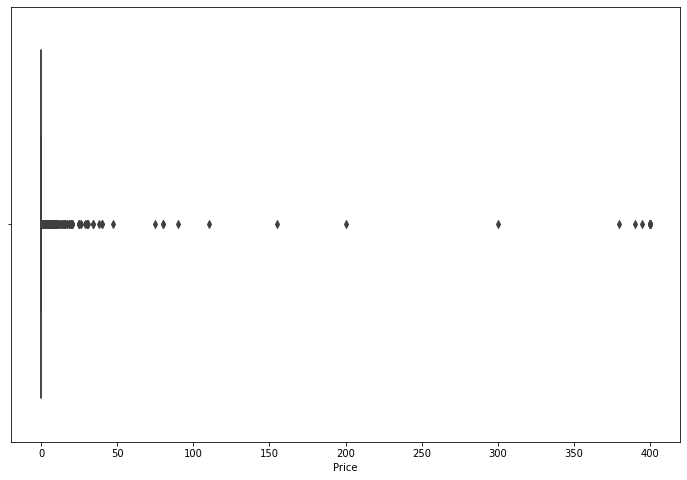

In [ ]:
plt.figure(figsize=(12 , 8))
sns.boxplot(df['Price'])
plt.show()


**Price: **

**From the box plot, it seems like there are some apps with very high price.**

**A price of $200 for an application on the Play Store is very high and suspicious!**

**Check out the records with very high price**

**Is 200 indeed a high price?**

**Drop these as most seem to be junk apps**

In [ ]:
df[df['Price'] > 200].count()

App               16
Category          16
Rating            16
Reviews           16
Size              16
Installs          16
Type              16
Price             16
Content Rating    16
Genres            16
Last Updated      16
Current Ver       16
Android Ver       16
dtype: int64

In [ ]:
df[df['Price'] > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5362,I Am Rich Pro,FAMILY,4.4,201,2700.0,5000,Paid,399.99,Everyone,Entertainment,"May 30, 2017",1.54,1.6 and up


In [ ]:
df[df['Price'] > 200].index

Int64Index([4197, 4362, 4367, 5351, 5354, 5355, 5356, 5357, 5358, 5362, 5364,
            5366, 5369, 5373, 9917, 9934],
           dtype='int64')

In [ ]:
df.drop(df[df['Price'] > 200].index , inplace=True)

In [ ]:
df[df['Price'] > 200].count()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

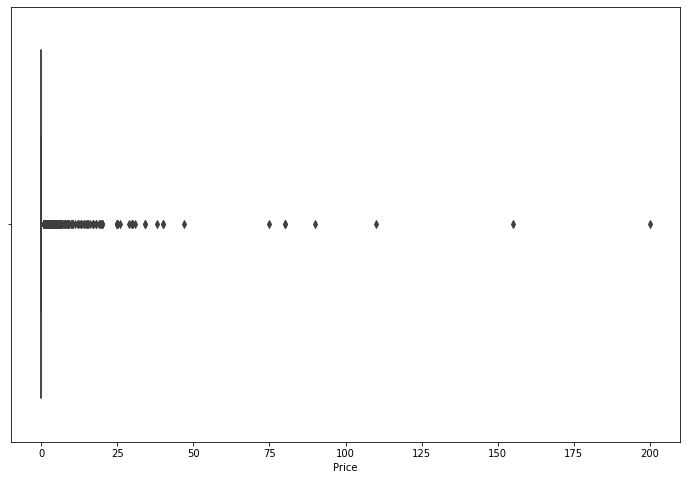

In [ ]:
plt.figure(figsize=(12 , 8))
sns.boxplot(df['Price']);


In [ ]:
df[df.Price > 200].count()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

**Boxplot for Reviews**

**Are there any apps with very high number of reviews?** 

Do the values seem right?

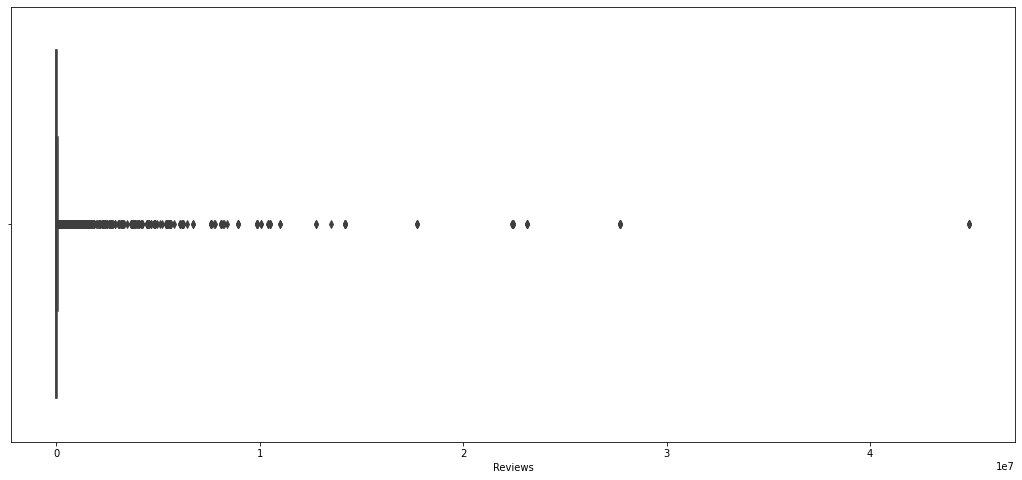

In [ ]:
plt.figure(figsize=(18 , 8))
sns.boxplot(df['Reviews']);

**Reviews:** 

**Very few apps have very high number of reviews.** 

**These are all star apps that don’t help with the analysis and, in fact, will skew it.** 

**Drop records having more than 2 million reviews.**

In [ ]:
df[df['Reviews'] > 2000000].count()

App               219
Category          219
Rating            219
Reviews           219
Size              219
Installs          219
Type              219
Price             219
Content Rating    219
Genres            219
Last Updated      219
Current Ver       219
Android Ver       219
dtype: int64

In [ ]:
df.shape

(8807, 13)

In [ ]:
df[df['Reviews'] > 2000000].index

Int64Index([  345,   347,   366,   378,   383,   395,   413,   419,   420,
              452,
            ...
             8399,  8445,  8894,  8896,  9140,  9142,  9166, 10186, 10190,
            10327],
           dtype='int64', length=219)

In [ ]:
df[137:139]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
164,Ebook Reader,BOOKS_AND_REFERENCE,4.1,85842,37000.0,5000000,Free,0.0,Everyone,Books & Reference,"June 25, 2018",5.0.6,4.0 and up
165,Litnet - E-books,BOOKS_AND_REFERENCE,4.6,7831,15000.0,100000,Free,0.0,Teen,Books & Reference,"July 4, 2018",1.2.3,4.0 and up


In [ ]:
df.drop(df[df['Reviews'] > 2000000].index , inplace=True)

In [ ]:
df[df['Reviews'] > 2000000].count()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

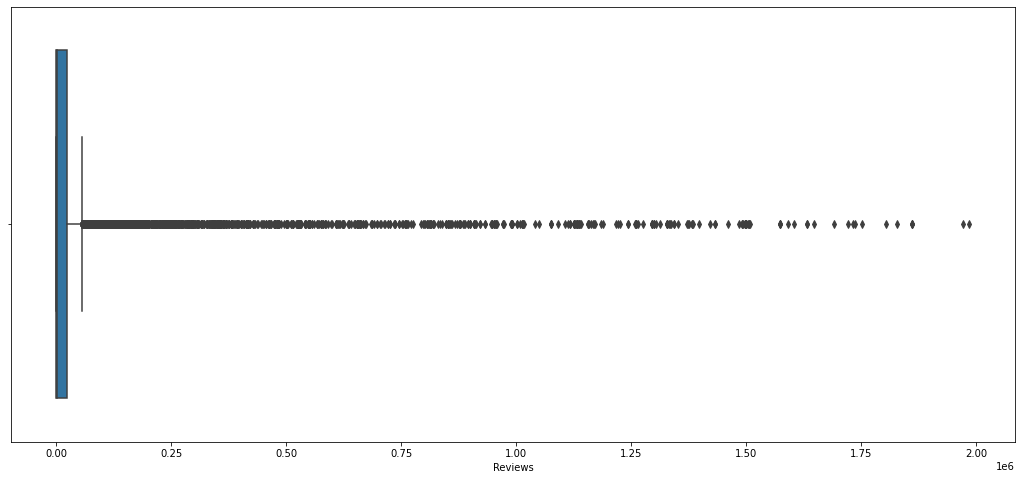

In [ ]:
plt.figure(figsize=(18 , 8))
sns.boxplot(df['Reviews']);

**Histogram for Rating**

**How are the ratings distributed?** 

**Is it more toward higher ratings?**

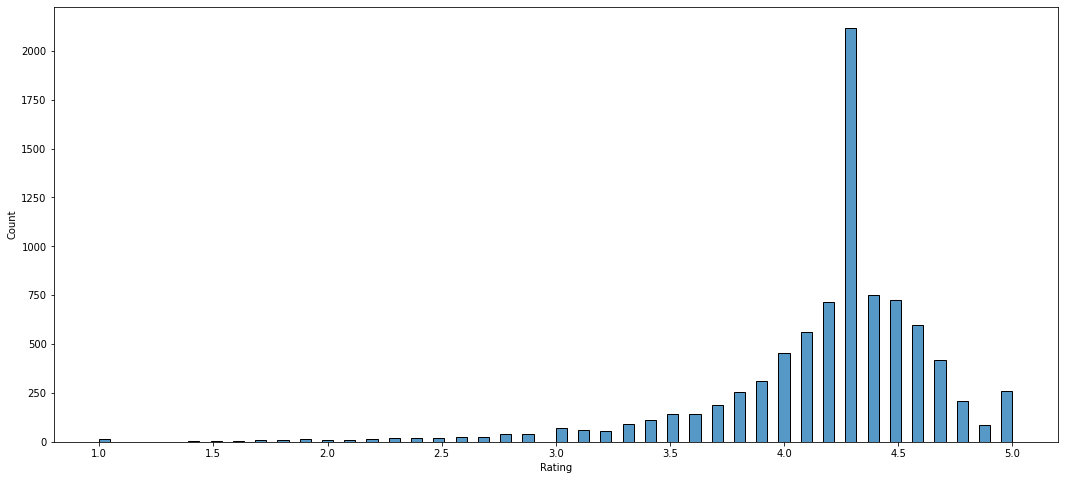

In [ ]:
plt.figure(figsize=(18 , 8))
sns.histplot(df['Rating']);

**Histogram for Size**

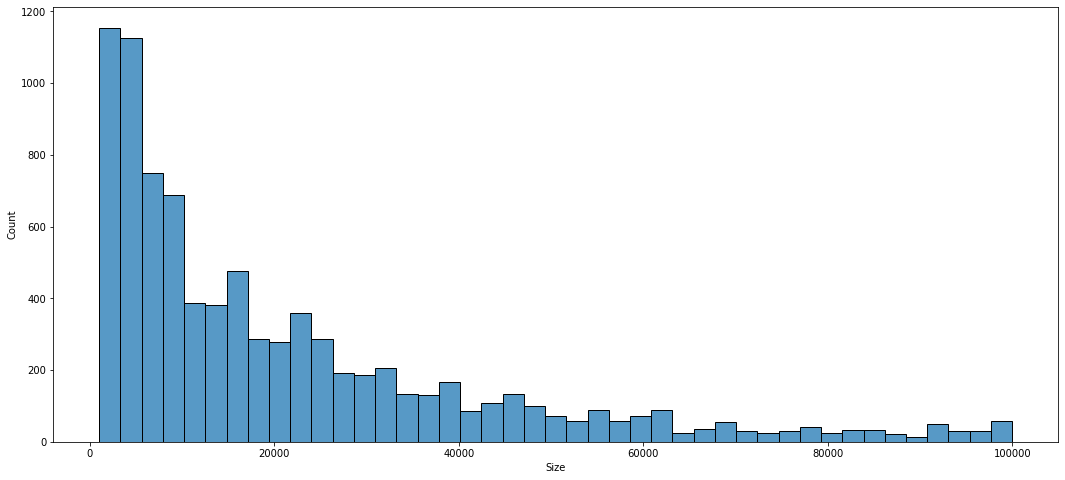

In [ ]:
plt.figure(figsize=(18 , 8))
sns.histplot(df['Size']);

Boxplot for Size

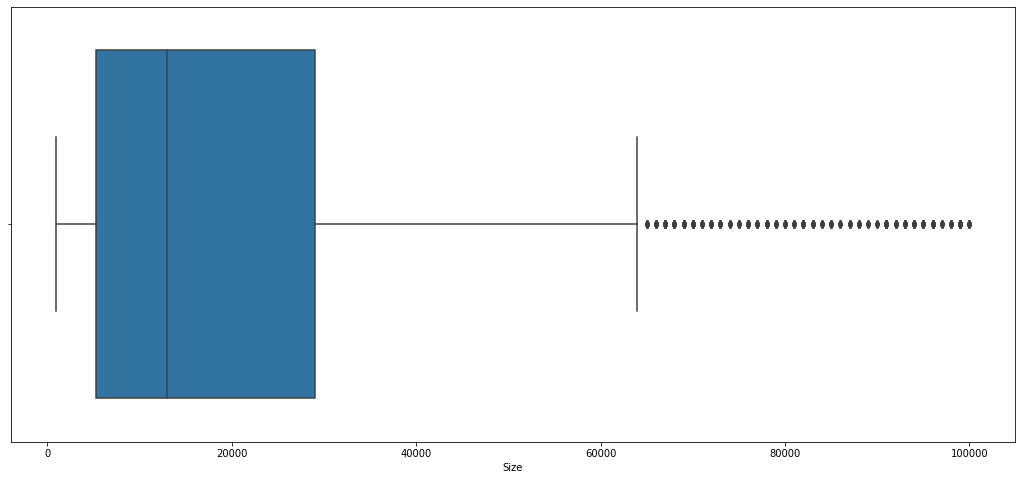

In [ ]:
plt.figure(figsize=(18 , 8))
sns.boxplot(df['Size']);

## **Installs:  **

**There seems to be some outliers in this field too.** 

**Apps having very high number of installs should be dropped from the analysis.**

**Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99**

**Decide a threshold as cutoff for outlier and drop records having values more than that**

In [ ]:
df.quantile([.1 , .25 , .50 , .70 , .90 , .95 , .99] , axis=0)

,Rating,Reviews,Size,Installs,Price
0.10,3.6,2.00,2900.0,100.0,0.00
0.25,4.0,20.00,5300.0,1000.0,0.00
0.50,4.3,718.50,13000.0,100000.0,0.00
0.70,4.4,11633.00,25000.0,1000000.0,0.00
0.90,4.7,149209.90,53000.0,10000000.0,0.00
0.95,4.8,349461.35,70000.0,10000000.0,1.99
0.99,5.0,1157271.02,96000.0,50000000.0,9.99


In [ ]:
df[df['Installs'] > 10000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
194,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002861,35000.0,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
225,Secure Folder,BUSINESS,3.8,14760,8600.0,50000000,Free,0.0,Everyone,Business,"January 31, 2018",1.1.07.6,7.0 and up
293,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002859,35000.0,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
346,imo beta free calls and text,COMMUNICATION,4.3,659395,11000.0,100000000,Free,0.0,Everyone,Communication,"June 7, 2018",9.8.000000010492,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10378,BMX Boy,GAME,4.2,839206,12000.0,50000000,Free,0.0,Everyone,Racing,"September 20, 2017",1.16.33,4.1 and up
10408,Shoot Hunter-Gun Killer,GAME,4.3,320334,27000.0,50000000,Free,0.0,Teen,Action,"August 8, 2018",1.1.2,4.1 and up
10429,Talking Tom Bubble Shooter,FAMILY,4.4,687136,54000.0,50000000,Free,0.0,Everyone,Casual,"May 25, 2018",1.5.3.20,4.1 and up
10513,Flight Simulator: Fly Plane 3D,FAMILY,4.0,660613,21000.0,50000000,Free,0.0,Everyone,Simulation,"March 1, 2017",1.32,2.3 and up


In [ ]:
df[df['Installs'] > 10000000].count()

App               176
Category          176
Rating            176
Reviews           176
Size              176
Installs          176
Type              176
Price             176
Content Rating    176
Genres            176
Last Updated      176
Current Ver       176
Android Ver       176
dtype: int64

In [ ]:
df[df['Installs'] > 10000000].index

Int64Index([    3,   194,   225,   293,   346,   874,   879,   886,   888,
              892,
            ...
             9641,  9680,  9844,  9860, 10253, 10378, 10408, 10429, 10513,
            10549],
           dtype='int64', length=176)

In [ ]:
df.shape

(8588, 13)

In [ ]:
df.drop(df[df['Installs'] > 10000000].index , inplace=True)
df.shape

(8412, 13)

In [ ]:
df[df['Installs'] > 10000000].count()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

**Make scatter plot/join plot for Rating vs. Price**

**What pattern do you observe? Does rating increase with price?**

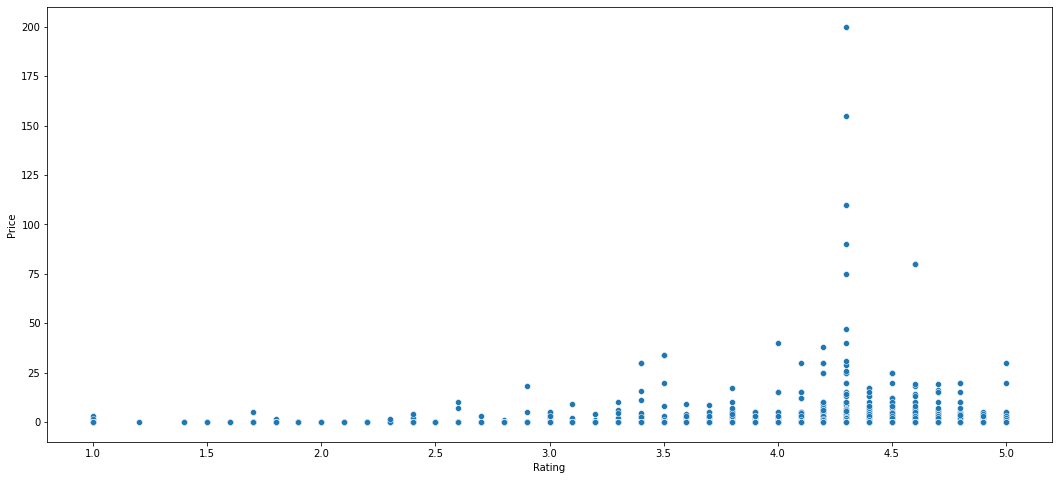

In [ ]:
plt.figure(figsize=(18 , 8))
sns.scatterplot(x='Rating' , y='Price' , data=df);

## Yes, Paid apps are higher ratings comapre to free apps.

**Make scatter plot/joinplot for Rating vs. Size**

**Are heavier apps rated better?**

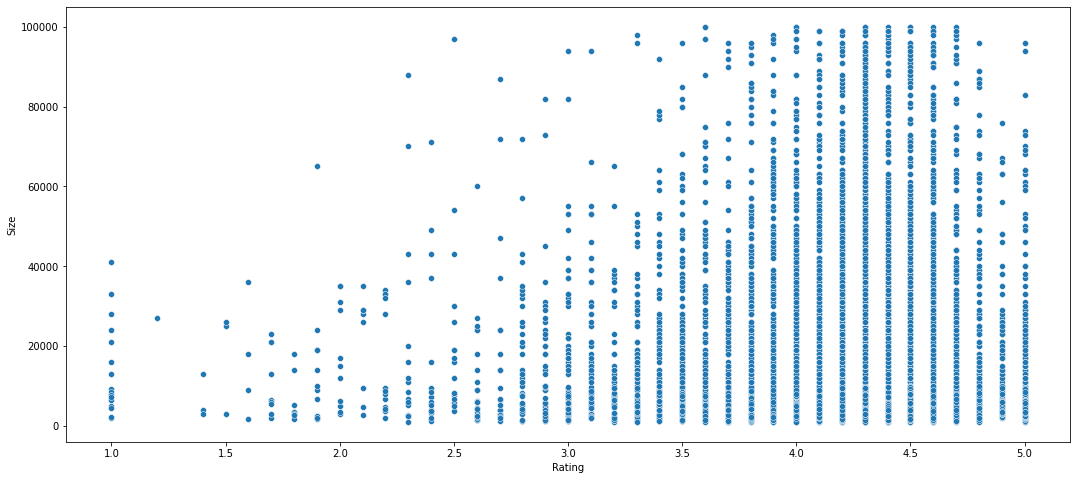

In [ ]:
plt.figure(figsize=(18 , 8))
sns.scatterplot(x='Rating' , y='Size' , data=df);

### Yes it is clear that heavior apps are rated better.

**Make scatter plot/join plot for Rating vs. Reviews**

**Does more review mean a better rating always?**

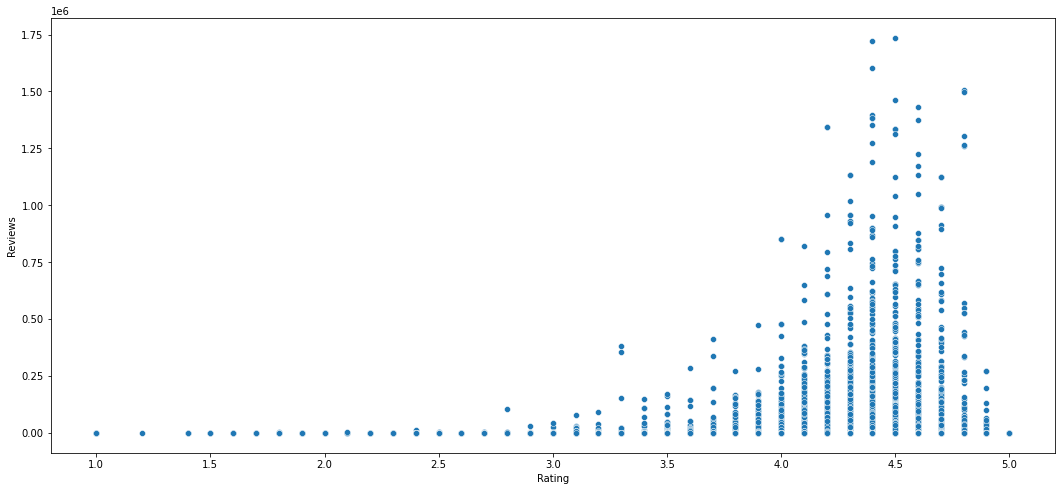

In [ ]:
plt.figure(figsize=(18 , 8))
sns.scatterplot(x='Rating' , y='Reviews' , data=df);

## It is cristal clear that more reviews makes app rating better.

**Make boxplot for Rating vs. Content Rating**

**Is there any difference in the ratings?** 

**Are some types liked better?**

In [ ]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

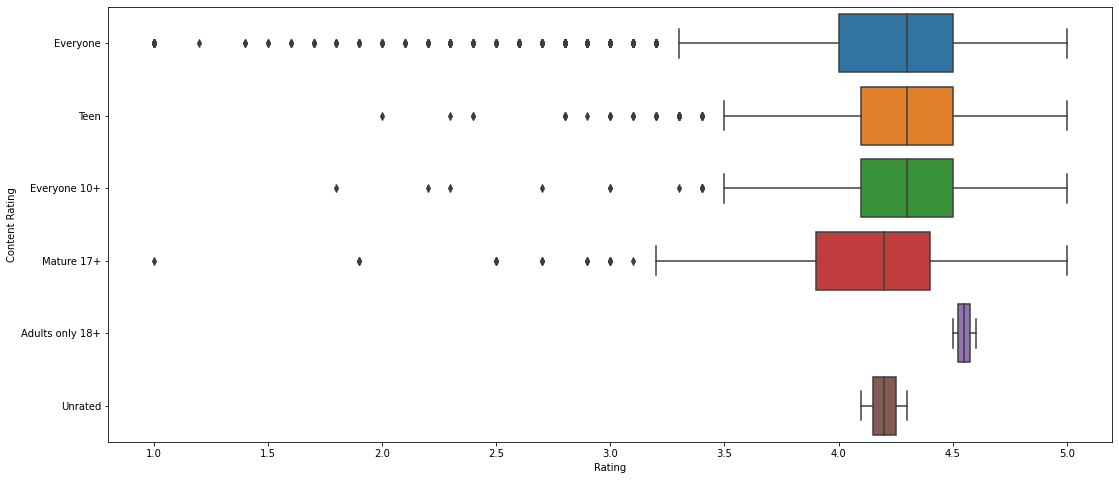

In [ ]:
plt.figure(figsize=(18 , 8))
sns.boxplot(x='Rating' , y='Content Rating' , data=df);

### Apps which are for everyone has more bad ratings compare to other sections as it has so much outliers value, while 18+ apps have better ratings.

**Make boxplot for Ratings vs. Category**

**Which genre has the best ratings?**


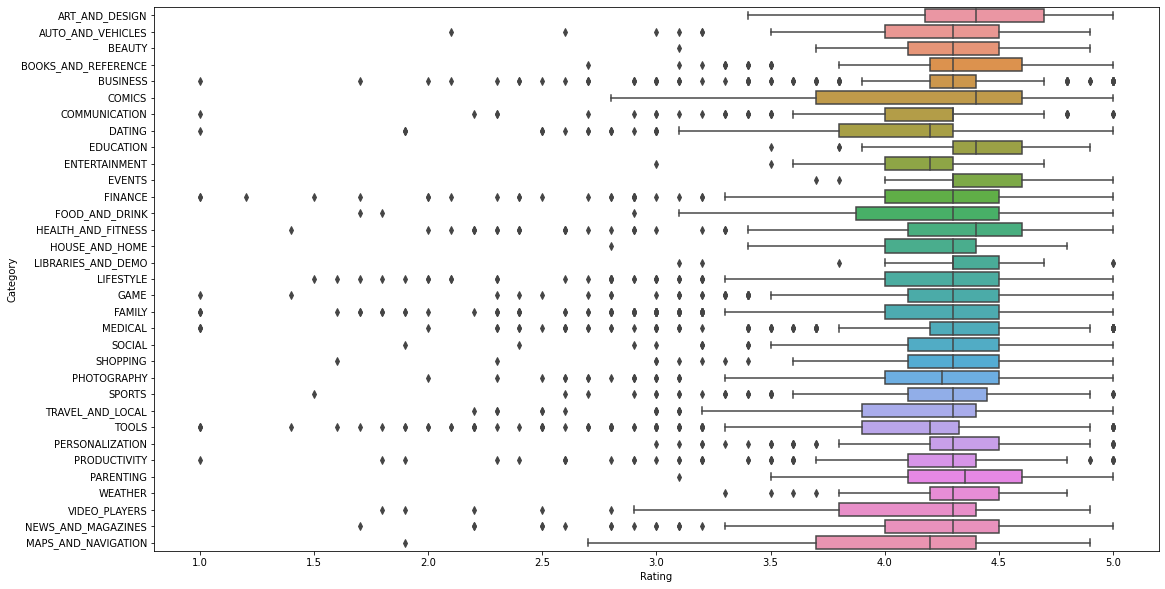

In [ ]:
plt.figure(figsize=(18 , 10))
sns.boxplot(x='Rating' , y='Category' , data=df);

## Events category has best ratings compare to others.

**create a copy of the dataframe to make all the edits. Name it inp1.**

In [ ]:
inp1 = df.copy()

In [ ]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [ ]:
inp1.skew()

Rating      -1.977902
Reviews      5.701536
Size         1.630005
Installs     2.166021
Price       27.651241
dtype: float64

**Reduce the skewness of Reviews**

In [ ]:
rerview_skew = np.log1p(inp1['Reviews'])
rerview_skew.skew()

-0.0070129590156540285

In [ ]:
inp1['Reviews'] = rerview_skew

**Reduce the skewness of Installs**

In [ ]:
installs_skew = np.log1p(inp1['Installs'])
installs_skew.skew()

-0.3449141689676943

In [ ]:
inp1['Installs'] = installs_skew

In [ ]:
inp1.skew()

Rating      -1.977902
Reviews     -0.007013
Size         1.630005
Installs    -0.344914
Price       27.651241
dtype: float64

In [ ]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,5.123964,5600.0,10.819798,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


### **Drop columns App, Last Updated, Current Ver, Type and Android Ver.**

In [ ]:
inp1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
unnecessary_columns = ['App' , 'Last Updated' , 'Current Ver' , 'Android Ver' , 'Type']
inp1.drop( unnecessary_columns, axis = 1 , inplace=True  )

In [ ]:
inp1.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Content Rating', 'Genres'],
      dtype='object')

In [ ]:
inp1.head(2)

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,0.0,Everyone,Art & Design;Pretend Play


In [ ]:
inp1.shape

(8412, 8)

**Get dummy columns for Category, Genres, and Content Rating.**

**This needs to be done as the models do not understand categorical data, and all data should be numeric.** 

**Dummy encoding is one way to convert character fields to numeric.** 

**Name of dataframe should be inp2**

In [ ]:
inp2 = inp1.copy()

In [ ]:
inp2.head(2)

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,0.0,Everyone,Art & Design;Pretend Play


## **Let's apply Dummy EnCoding on Column "Category"**

In [ ]:
inp2.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [ ]:
inp2.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Content Rating', 'Genres'],
      dtype='object')

In [ ]:
Category_Dummy = pd.get_dummies(inp2['Category'],prefix='Category').head()
Category_Dummy.head(2)

,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,Category_FAMILY,Category_FINANCE,Category_FOOD_AND_DRINK,Category_GAME,Category_HEALTH_AND_FITNESS,Category_HOUSE_AND_HOME,Category_LIBRARIES_AND_DEMO,Category_LIFESTYLE,Category_MAPS_AND_NAVIGATION,Category_MEDICAL,Category_NEWS_AND_MAGAZINES,Category_PARENTING,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## **Let's apply Dummy EnCoding on Column "Genres"**

In [ ]:
inp2.Genres.unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education', 'Education;Creativity', 'Education;Education',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Brain Games', 'Entertainment;Music & Video',
       'Events', 'Finance', 'Food & Drink', 'Health & Fitness',
       'House & Home', 'Libraries & Demo', 'Lifestyle',
       'Lifestyle;Pretend Play', 'Card', 'Casual', 'Puzzle', 'Action',
       'Arcade', 'Word', 'Racing', 'Casual;Creativity', 'Sports', 'Board',
       'Simulation', 'Role Playing', 'Strategy', 'Simulation;Education',
       'Action;Action & Adventure', 'Trivia', 'Casual;Brain Games',
       'Simulation;Action & Adventure', 'Educational;Creativity',
       'Puzzle;Brain Gam

In [ ]:
#lists = []
#for i in inp2.Genres.value_counts().index:
 #   if inp2.Genres.value_counts()[i]<20:
  #      lists.append(i)
#inp2.Genres = ['Other' if i in lists else i for i in inp2.Genres] 

In [ ]:
inp2.Genres.unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education', 'Education;Creativity', 'Education;Education',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Brain Games', 'Entertainment;Music & Video',
       'Events', 'Finance', 'Food & Drink', 'Health & Fitness',
       'House & Home', 'Libraries & Demo', 'Lifestyle',
       'Lifestyle;Pretend Play', 'Card', 'Casual', 'Puzzle', 'Action',
       'Arcade', 'Word', 'Racing', 'Casual;Creativity', 'Sports', 'Board',
       'Simulation', 'Role Playing', 'Strategy', 'Simulation;Education',
       'Action;Action & Adventure', 'Trivia', 'Casual;Brain Games',
       'Simulation;Action & Adventure', 'Educational;Creativity',
       'Puzzle;Brain Gam

In [ ]:
inp2.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Content Rating', 'Genres'],
      dtype='object')

In [ ]:
Genres_Dummy = pd.get_dummies(inp2['Genres'],prefix='Genres').head()
Genres_Dummy.head(2)

,Genres_Action,Genres_Action;Action & Adventure,Genres_Adventure,Genres_Adventure;Action & Adventure,Genres_Adventure;Brain Games,Genres_Adventure;Education,Genres_Arcade,Genres_Arcade;Action & Adventure,Genres_Arcade;Pretend Play,Genres_Art & Design,Genres_Art & Design;Action & Adventure,Genres_Art & Design;Creativity,Genres_Art & Design;Pretend Play,Genres_Auto & Vehicles,Genres_Beauty,Genres_Board,Genres_Board;Action & Adventure,Genres_Board;Brain Games,Genres_Board;Pretend Play,Genres_Books & Reference,Genres_Books & Reference;Creativity,Genres_Books & Reference;Education,Genres_Business,Genres_Card,Genres_Card;Action & Adventure,Genres_Card;Brain Games,Genres_Casino,Genres_Casual,Genres_Casual;Action & Adventure,Genres_Casual;Brain Games,Genres_Casual;Creativity,Genres_Casual;Education,Genres_Casual;Music & Video,Genres_Casual;Pretend Play,Genres_Comics,Genres_Comics;Creativity,Genres_Communication,Genres_Dating,Genres_Education,Genres_Education;Action & Adventure,Genres_Education;Brain Games,Genres_Education;Creativity,Genres_Education;Education,Genres_Education;Music & Video,Genres_Education;Pretend Play,Genres_Educational,Genres_Educational;Action & Adventure,Genres_Educational;Brain Games,Genres_Educational;Creativity,Genres_Educational;Education,Genres_Educational;Pretend Play,Genres_Entertainment,Genres_Entertainment;Action & Adventure,Genres_Entertainment;Brain Games,Genres_Entertainment;Creativity,Genres_Entertainment;Education,Genres_Entertainment;Music & Video,Genres_Entertainment;Pretend Play,Genres_Events,Genres_Finance,Genres_Food & Drink,Genres_Health & Fitness,Genres_Health & Fitness;Action & Adventure,Genres_Health & Fitness;Education,Genres_House & Home,Genres_Libraries & Demo,Genres_Lifestyle,Genres_Lifestyle;Pretend Play,Genres_Maps & Navigation,Genres_Medical,Genres_Music,Genres_Music & Audio;Music & Video,Genres_Music;Music & Video,Genres_News & Magazines,Genres_Parenting,Genres_Parenting;Brain Games,Genres_Parenting;Education,Genres_Parenting;Music & Video,Genres_Personalization,Genres_Photography,Genres_Productivity,Genres_Puzzle,Genres_Puzzle;Action & Adventure,Genres_Puzzle;Brain Games,Genres_Puzzle;Creativity,Genres_Puzzle;Education,Genres_Racing,Genres_Racing;Action & Adventure,Genres_Racing;Pretend Play,Genres_Role Playing,Genres_Role Playing;Action & Adventure,Genres_Role Playing;Brain Games,Genres_Role Playing;Education,Genres_Role Playing;Pretend Play,Genres_Shopping,Genres_Simulation,Genres_Simulation;Action & Adventure,Genres_Simulation;Education,Genres_Simulation;Pretend Play,Genres_Social,Genres_Sports,Genres_Sports;Action & Adventure,Genres_Strategy,Genres_Strategy;Action & Adventure,Genres_Strategy;Creativity,Genres_Strategy;Education,Genres_Tools,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Trivia;Education,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## **Let's apply Dummy EnCoding on Column "Content Rating"**

In [ ]:
inp2['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [ ]:
inp2.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Content Rating', 'Genres'],
      dtype='object')

In [ ]:
Content_Rating_Dummy = pd.get_dummies(inp2['Content Rating'],prefix='Content_Rating').head(2)
Content_Rating_Dummy.head(2)

,Content_Rating_Adults only 18+,Content_Rating_Everyone,Content_Rating_Everyone 10+,Content_Rating_Mature 17+,Content_Rating_Teen,Content_Rating_Unrated
0,0,1,0,0,0,0
1,0,1,0,0,0,0


In [ ]:
inp2 = pd.concat([inp2 ,Category_Dummy , Genres_Dummy , Content_Rating_Dummy] , axis=1 )

In [ ]:
inp2.head(2)

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,Category_FAMILY,Category_FINANCE,Category_FOOD_AND_DRINK,Category_GAME,Category_HEALTH_AND_FITNESS,Category_HOUSE_AND_HOME,Category_LIBRARIES_AND_DEMO,Category_LIFESTYLE,Category_MAPS_AND_NAVIGATION,Category_MEDICAL,Category_NEWS_AND_MAGAZINES,Category_PARENTING,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Genres_Action,Genres_Action;Action & Adventure,Genres_Adventure,Genres_Adventure;Action & Adventure,Genres_Adventure;Brain Games,Genres_Adventure;Education,Genres_Arcade,Genres_Arcade;Action & Adventure,Genres_Arcade;Pretend Play,Genres_Art & Design,Genres_Art & Design;Action & Adventure,Genres_Art & Design;Creativity,Genres_Art & Design;Pretend Play,Genres_Auto & Vehicles,Genres_Beauty,Genres_Board,Genres_Board;Action & Adventure,Genres_Board;Brain Games,Genres_Board;Pretend Play,Genres_Books & Reference,Genres_Books & Reference;Creativity,Genres_Books & Reference;Education,Genres_Business,Genres_Card,Genres_Card;Action & Adventure,Genres_Card;Brain Games,Genres_Casino,Genres_Casual,Genres_Casual;Action & Adventure,Genres_Casual;Brain Games,Genres_Casual;Creativity,Genres_Casual;Education,Genres_Casual;Music & Video,Genres_Casual;Pretend Play,Genres_Comics,Genres_Comics;Creativity,Genres_Communication,Genres_Dating,Genres_Education,Genres_Education;Action & Adventure,Genres_Education;Brain Games,Genres_Education;Creativity,Genres_Education;Education,Genres_Education;Music & Video,Genres_Education;Pretend Play,Genres_Educational,Genres_Educational;Action & Adventure,Genres_Educational;Brain Games,Genres_Educational;Creativity,Genres_Educational;Education,Genres_Educational;Pretend Play,Genres_Entertainment,Genres_Entertainment;Action & Adventure,Genres_Entertainment;Brain Games,Genres_Entertainment;Creativity,Genres_Entertainment;Education,Genres_Entertainment;Music & Video,Genres_Entertainment;Pretend Play,Genres_Events,Genres_Finance,Genres_Food & Drink,Genres_Health & Fitness,Genres_Health & Fitness;Action & Adventure,Genres_Health & Fitness;Education,Genres_House & Home,Genres_Libraries & Demo,Genres_Lifestyle,Genres_Lifestyle;Pretend Play,Genres_Maps & Navigation,Genres_Medical,Genres_Music,Genres_Music & Audio;Music & Video,Genres_Music;Music & Video,Genres_News & Magazines,Genres_Parenting,Genres_Parenting;Brain Games,Genres_Parenting;Education,Genres_Parenting;Music & Video,Genres_Personalization,Genres_Photography,Genres_Productivity,Genres_Puzzle,Genres_Puzzle;Action & Adventure,Genres_Puzzle;Brain Games,Genres_Puzzle;Creativity,Genres_Puzzle;Education,Genres_Racing,Genres_Racing;Action & Adventure,Genres_Racing;Pretend Play,Genres_Role Playing,Genres_Role Playing;Action & Adventure,Genres_Role Playing;Brain Games,Genres_Role Playing;Education,Genres_Role Playing;Pretend Play,Genres_Shopping,Genres_Simulation,Genres_Simulation;Action & Adventure,Genres_Simulation;Education,Genres_Simulation;Pretend Play,Genres_Social,Genres_Sports,Genres_Sports;Action & Adventure,Genres_Strategy,Genres_Strategy;Action & Adventure,Genres_Strategy;Creativity,Genres_Strategy;Education,Genres_Tools,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Trivia;Education,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Content_Rating_Adults only 18+,Content_Rating_Everyone,Content_Rating_Everyone 10+,Content_Rating_Mature 17+,Content_Rating_Teen,Content_Rating_Unrated
0,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,0.0,Everyone,Art & Design,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
inp2.shape

(8412, 163)

In [ ]:
 del inp2['Category']
 del inp2['Genres']
 del inp2['Content Rating']

In [ ]:
inp2.head()

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,Category_FAMILY,Category_FINANCE,Category_FOOD_AND_DRINK,Category_GAME,Category_HEALTH_AND_FITNESS,Category_HOUSE_AND_HOME,Category_LIBRARIES_AND_DEMO,Category_LIFESTYLE,Category_MAPS_AND_NAVIGATION,Category_MEDICAL,Category_NEWS_AND_MAGAZINES,Category_PARENTING,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Genres_Action,Genres_Action;Action & Adventure,Genres_Adventure,Genres_Adventure;Action & Adventure,Genres_Adventure;Brain Games,Genres_Adventure;Education,Genres_Arcade,Genres_Arcade;Action & Adventure,Genres_Arcade;Pretend Play,Genres_Art & Design,Genres_Art & Design;Action & Adventure,Genres_Art & Design;Creativity,Genres_Art & Design;Pretend Play,Genres_Auto & Vehicles,Genres_Beauty,Genres_Board,Genres_Board;Action & Adventure,Genres_Board;Brain Games,Genres_Board;Pretend Play,Genres_Books & Reference,Genres_Books & Reference;Creativity,Genres_Books & Reference;Education,Genres_Business,Genres_Card,Genres_Card;Action & Adventure,Genres_Card;Brain Games,Genres_Casino,Genres_Casual,Genres_Casual;Action & Adventure,Genres_Casual;Brain Games,Genres_Casual;Creativity,Genres_Casual;Education,Genres_Casual;Music & Video,Genres_Casual;Pretend Play,Genres_Comics,Genres_Comics;Creativity,Genres_Communication,Genres_Dating,Genres_Education,Genres_Education;Action & Adventure,Genres_Education;Brain Games,Genres_Education;Creativity,Genres_Education;Education,Genres_Education;Music & Video,Genres_Education;Pretend Play,Genres_Educational,Genres_Educational;Action & Adventure,Genres_Educational;Brain Games,Genres_Educational;Creativity,Genres_Educational;Education,Genres_Educational;Pretend Play,Genres_Entertainment,Genres_Entertainment;Action & Adventure,Genres_Entertainment;Brain Games,Genres_Entertainment;Creativity,Genres_Entertainment;Education,Genres_Entertainment;Music & Video,Genres_Entertainment;Pretend Play,Genres_Events,Genres_Finance,Genres_Food & Drink,Genres_Health & Fitness,Genres_Health & Fitness;Action & Adventure,Genres_Health & Fitness;Education,Genres_House & Home,Genres_Libraries & Demo,Genres_Lifestyle,Genres_Lifestyle;Pretend Play,Genres_Maps & Navigation,Genres_Medical,Genres_Music,Genres_Music & Audio;Music & Video,Genres_Music;Music & Video,Genres_News & Magazines,Genres_Parenting,Genres_Parenting;Brain Games,Genres_Parenting;Education,Genres_Parenting;Music & Video,Genres_Personalization,Genres_Photography,Genres_Productivity,Genres_Puzzle,Genres_Puzzle;Action & Adventure,Genres_Puzzle;Brain Games,Genres_Puzzle;Creativity,Genres_Puzzle;Education,Genres_Racing,Genres_Racing;Action & Adventure,Genres_Racing;Pretend Play,Genres_Role Playing,Genres_Role Playing;Action & Adventure,Genres_Role Playing;Brain Games,Genres_Role Playing;Education,Genres_Role Playing;Pretend Play,Genres_Shopping,Genres_Simulation,Genres_Simulation;Action & Adventure,Genres_Simulation;Education,Genres_Simulation;Pretend Play,Genres_Social,Genres_Sports,Genres_Sports;Action & Adventure,Genres_Strategy,Genres_Strategy;Action & Adventure,Genres_Strategy;Creativity,Genres_Strategy;Education,Genres_Tools,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Trivia;Education,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Content_Rating_Adults only 18+,Content_Rating_Everyone,Content_Rating_Everyone 10+,Content_Rating_Mature 17+,Content_Rating_Teen,Content_Rating_Unrated
0,4.1,5.075174,19000.0,9.210440,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
inp2.shape

(8412, 160)

In [ ]:
# pd.get_dummies(inp2['Content Rating']).iloc[: , 1:].head(2)
# dummy data shoul be (n-1)

In [ ]:
d1 = inp2
X = d1.drop('Rating',axis=1)
y = d1['Rating']

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.3, random_state=5)

In [ ]:
print('Xtrain = ' , Xtrain.shape)
print('Xtest = ' , Xtest.shape)
print('ytrain = ' , ytrain.shape)
print('ytest = ' , ytest.shape)

Xtrain =  (5888, 159)
Xtest =  (2524, 159)
ytrain =  (5888,)
ytest =  (2524,)


In [ ]:
model = LinearRegression()
model


LinearRegression()

In [ ]:
Xtrain = Xtrain.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
Xtest = Xtest.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
ytrain = ytrain.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
ytest = ytest.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
print('Xtrain = ' , Xtrain.shape)
print('Xtest = ' , Xtest.shape)
print('ytrain = ' , ytrain.shape)
print('ytest = ' , ytest.shape)

Xtrain =  (5888, 159)
Xtest =  (2524, 159)
ytrain =  (5888,)
ytest =  (2524,)


In [ ]:
model.fit(Xtrain , ytrain)

LinearRegression()

In [ ]:
model.coef_

array([ 1.33995146e-01, -9.99652607e-08, -1.21677420e-01, -1.87699057e-03,
        2.18794037e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  2.34698111e-01,  0.00000000e+00,
       -1.59040736e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [ ]:
model.intercept_

4.57700649321405

In [ ]:
R2_train = round(model.score(Xtrain , ytrain) , 3)
R2_train

0.086

In [ ]:
R2_test = round(model.score(Xtest , ytest) , 3)
R2_test

0.067

In [ ]:
print("The R2 value of the Testing Set is : {}".format(R2_test))

The R2 value of the Testing Set is : 0.067
